In [ ]:
from google.colab import files
_ = files.upload()

**TextBlob — фундаментальний клас для NLP-операцій у модулі textblob**

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'
blob = TextBlob(text)
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [ ]:
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [ ]:
nltk.download('averaged_perceptron_tagger', quiet=True)
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

In [ ]:
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

**Вилучення іменних конструкцій**

In [ ]:
nltk.download('brown', quiet=True)
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

**Аналіз емоційного забарвлення**

In [ ]:
print(blob.sentiment)
print('{0:0.3f}'.format(blob.sentiment.polarity))
print('{0:0.3f}'.format(blob.sentiment.subjectivity))

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)
0.075
0.833


In [ ]:
for sentence in blob.sentences:
  print(sentence)
  print(sentence.sentiment)

Today is a beautiful day.
Sentiment(polarity=0.85, subjectivity=1.0)
Tomorrow looks like bad weather.
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [ ]:
nltk.download('movie_reviews', quiet=True)
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
print(blob)
print(blob.sentiment)

Today is a beautiful day. Tomorrow looks like bad weather.
Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)


In [ ]:
for sentence in blob.sentences:
  print(sentence)
  print(sentence.sentiment)

Today is a beautiful day.
Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Tomorrow looks like bad weather.
Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


**Формоутворення: однина та множина**

In [ ]:
from textblob import Word

In [ ]:
index = Word('index')
index.pluralize()

'indices'

In [ ]:
cacti = Word('cacti')
cacti.pluralize()

'cactis'

In [ ]:
animals = TextBlob('dog cat fish bird').words
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

In [ ]:
word = Word('theyr')
%precision 2
word.spellcheck()

[('they', 0.57), ('their', 0.43)]

In [ ]:
word.correct()

'they'

In [ ]:
sentence = TextBlob('The sentense has missplled wrds.')
sentence.correct()

TextBlob("The sentence has misspelled words.")

In [ ]:
nltk.download('wordnet', quiet=True)
word = Word('varieties')
print(word.stem())
print(word.lemmatize())

varieti
variety


**Аналіз "Ромео і Джульєтти"**

In [ ]:
from pathlib import Path

In [ ]:
blob = TextBlob(Path('romeo_and_juliet.txt').read_text())
print('Juliet: ', blob.word_counts['juliet'])
print('Romeo: ', blob.word_counts['romeo'])

Juliet:  190
Romeo:  315


In [ ]:
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

In [ ]:
stops = stopwords.words('english')
blob = TextBlob('Today is a beautiful day.')
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

**Візуалізація частот входження слів засобами Pandas**

In [ ]:
blob = TextBlob(Path('romeo_and_juliet.txt').read_text())
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stops]

In [ ]:
import pandas as pd

from operator import itemgetter

In [ ]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[1:21]
df = pd.DataFrame(top20, columns=['word', 'count'])
df

,word,count
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


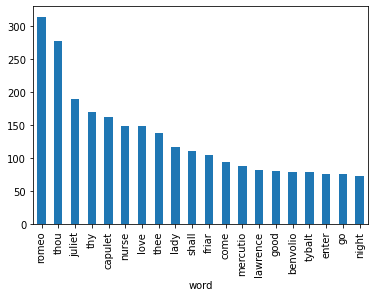

In [ ]:
axes = df.plot.bar(x='word', y='count', legend=False)

In [ ]:
import imageio

from wordcloud import WordCloud

In [ ]:
mask_image = imageio.imread('jellyfish.png')
text = Path('romeo_and_juliet.txt').read_text()
wordcloud = WordCloud(colormap='prism', mask=mask_image, 
                      background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('romeo_and_juliet_jellyfish.png')